In [46]:

from utils import *
from computes import *
%matplotlib inline

In [47]:
# load dataset
X_train, y_train = load_data("../sources/data/applicants.txt")

In [25]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:", type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [26]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:", type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [27]:
print('The shape of X_train is: ' + str(X_train.shape))
print('The shape of y_train is: ' + str(y_train.shape))
print('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


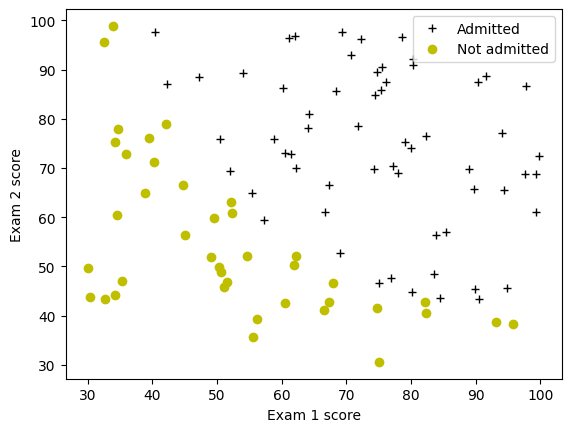

In [28]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score')
# Set the x-axis label
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

In [30]:
# Note: You can edit this value
value = 0

print(f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


In [31]:
print("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *

sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


In [33]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [34]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

# UNIT TESTS
compute_cost_test(compute_cost)

Cost at test w and b (non-zeros): 0.218
All tests passed!


In [36]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}')
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}')

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [37]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([0.2, -0.5])
test_b = -24
dj_db, dj_dw = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

# UNIT TESTS
compute_gradient_test(compute_gradient)

dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]
All tests passed!


In [39]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w, b, J_history, _ = gradient_descent(X_train, y_train, initial_w, initial_b,
                                      compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


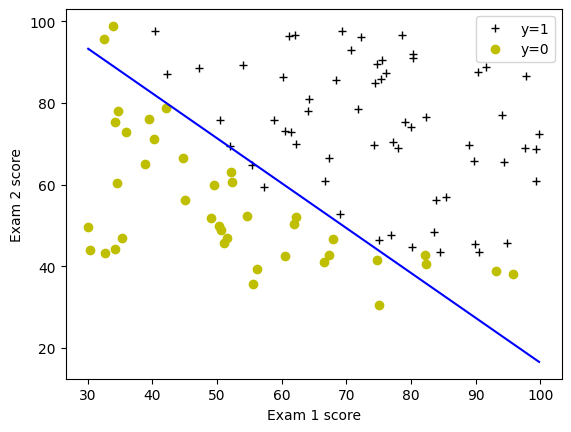

In [40]:
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Exam 2 score')
# Set the x-axis label
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

In [43]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    ### START CODE HERE ###
    # Loop over each example
    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        if f_wb > 0.5:
            p[i] = 1.0
        else:
            p[i] = 0.0

    ### END CODE HERE ###
    return p

In [42]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS
predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!


In [44]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000
